In [ ]:
#Dataset from: https://www.kaggle.com/rakannimer/air-passengers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import acf
from pandas.plotting import autocorrelation_plot

In [21]:
# load the dataset
df = pd.read_csv('Data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


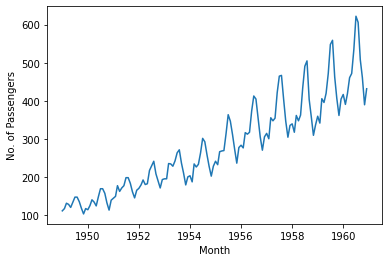

In [22]:
df.set_index('Month', inplace=True) 
plt.plot(df['#Passengers'])
plt.xlabel('Month')
plt.ylabel('No. of Passengers')
plt.show()

### Check for Stationarity 
To use ARIMA-based models we need to check for the stationarity of the underlying stochastic process\
we use Dickey-Fuller Test using statsmodel for this purpose which tests for unit root

In [17]:
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df)
print("pvalue = {} ".format(pvalue))

pvalue = 0.991880243437641 if above 0.05, data is not stationary


Lookig at the pvalue, we can accept the null hypothesis that unit root is present in the data so the data is not stationary\
here we can use SARIMA instead of ARIMA

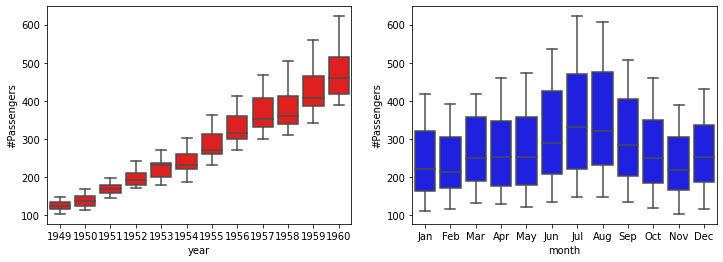

In [49]:
# Lets's plot the trend for years vs months
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

fig ,ax  = plt.subplots(1,2,figsize=(12,4))
#Ploting yearly and monthly trend as boxplot
sns.boxplot(x='year', y='#Passengers', data=df,ax=ax[0],color='r')
sns.boxplot(x='month', y='#Passengers', data=df,ax=ax[1],color='b')
plt.show()

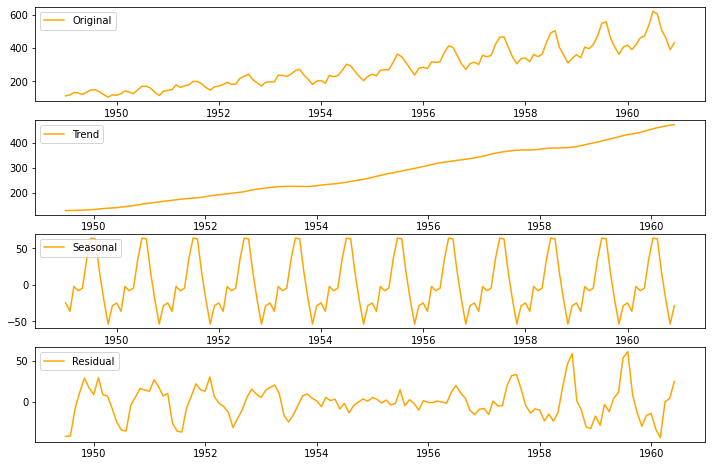

In [32]:
#Extract and plot trend, seasonal and residuals. 

decomposed = seasonal_decompose(df['#Passengers'],  
                            model ='additive')

#Additive time series:
#Value = Base Level + Trend + Seasonality + Error
#Multiplicative Time Series:
#Value = Base Level x Trend x Seasonality x Error

trend = decomposed.trend
seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
residual = decomposed.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['#Passengers'], label='Original', color='orange')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='orange')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='orange')
plt.legend(loc='upper left')
plt.show()

### Autocorrelation
Autocorrelation is simply the correlation of a series with its own lags.\
We simply plot lag on x axis and correlation on y axis\
Any correlation above confidence lnes are statistically significant.

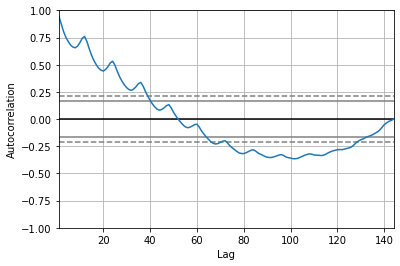

In [41]:
autocorrelation_plot(df['#Passengers'])
plt.show()

Here Horizontal bands indicate 95% and 99% (dashed) confidence band\

Its apparant that A strong positive correlation for lags below 40 (months)